Create an interactive map displaying countries and average temperature in time.

Data: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

See https://www.kaggle.com/ash316/is-the-mercury-rising

In [ ]:
#!pip install ipywidgets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

global1=pd.read_csv('../datasets/global_temp/GlobalTemperatures.csv')
global1=global1[['dt','LandAverageTemperature']]
global1.dropna(inplace=True)
# better to use resample?
global1['dt']=pd.to_datetime(global1.dt).dt.strftime('%d/%m/%Y')
global1['dt']=global1['dt'].apply(lambda x:x[6:])
global1=global1.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

global1

,dt,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


<AxesSubplot:>

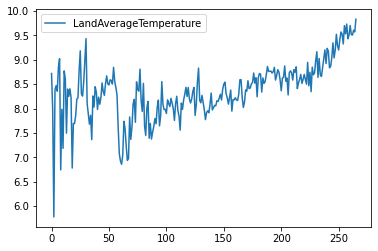

In [3]:
global1.plot()

Temperature is going up.  How to convert to a date time so axis is right?

In [4]:
!pip install geopandas

In [5]:
import geopandas



In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [7]:
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

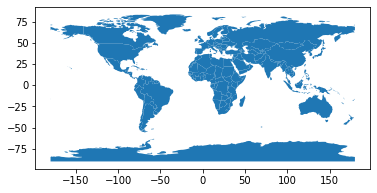

In [8]:
world.plot()

Attempt to reproduce this with country name map, etc.. but for global temp.
Create an interactive map with a slider [ipywidgets](https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb#scrollTo=Nwm1m14xB5fD)

Refs:

https://in.springboard.com/blog/time-series-analysis-interactive-time-series-maps-for-covid-19-spread/

https://stackoverflow.com/questions/16253060/how-to-convert-country-names-to-iso-3166-1-alpha-2-values-using-python


In [152]:
country_temps=pd.read_csv('../datasets/global_temp/GlobalLandTemperaturesByCountry.csv')

In [153]:
country_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [154]:
#country_temps = country_temps.fillna(0)
country_temps.dt = pd.to_datetime(country_temps.dt)
# country_temps = country_temps.set_index('dt')
country_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [155]:
country_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [167]:
# see what the country names are that are used.
data_countries = country_temps.Country.unique()
data_countries

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte d'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [157]:
#check against world map data.  They are different.  We need a way to convert themn
world_countries = np.sort(world.name.unique())

In [160]:
# differences = list(set(data_countries).symmetric_difference(world_countries))
# differences = np.sort(differences)

differences = np.setxor1d(data_countries, world_countries)
np.sort(differences)

array(['Africa', 'American Samoa', 'Andorra', 'Anguilla',
       'Antigua And Barbuda', 'Aruba', 'Asia', 'Bahrain', 'Baker Island',
       'Barbados', 'Bonaire, Saint Eustatius And Saba',
       'Bosnia And Herzegovina', 'Bosnia and Herz.',
       'British Virgin Islands', 'Brunei', 'Burma', 'Cape Verde',
       'Cayman Islands', 'Central African Rep.',
       'Central African Republic', 'Christmas Island', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Curaçao', 'Czech Republic',
       'Czechia', "Côte D'Ivoire", "Côte d'Ivoire", 'Dem. Rep. Congo',
       'Denmark (Europe)', 'Dominica', 'Dominican Rep.',
       'Dominican Republic', 'Eq. Guinea', 'Equatorial Guinea', 'Europe',
       'Falkland Is.', 'Falkland Islands (Islas Malvinas)',
       'Faroe Islands', 'Federated States Of Micronesia',
       'Fr. S. Antarctic Lands', 'France (Europe)', 'French Guiana',
       'French Polynesia', 'French Southern And Antarctic Lands',
       'Gaza Strip', 'Grenada', 'Guadeloupe', 'Gu

In [171]:
# map from country names in data to world names from above list
# is there a better way?  What happens when names change?
country_map = {
    'United States':'United States of America',
    'Timor Leste':'Timor-Leste',
    'Guinea Bissau': 'Guinea-Bissau',
    "Côte D'Ivoire": "Côte d'Ivoire",
    'W. Sahara': 'Western Sahara',
    "Congo (Democratic Republic Of The)":"Congo"
}

# function to return either the country or mapped value
def map_country(country):
    mapped = country_map.get(country)
    if mapped is not None:
        return mapped
    return country

country_temps.Country = country_temps.Country.map(map_country)
# country_temps.Country.unique()

In [172]:
merged = world.merge(country_temps, left_on='name', right_on='Country')
merged = merged.sort_values('dt')

Text(0.5, 1.0, 'Average temp by country')

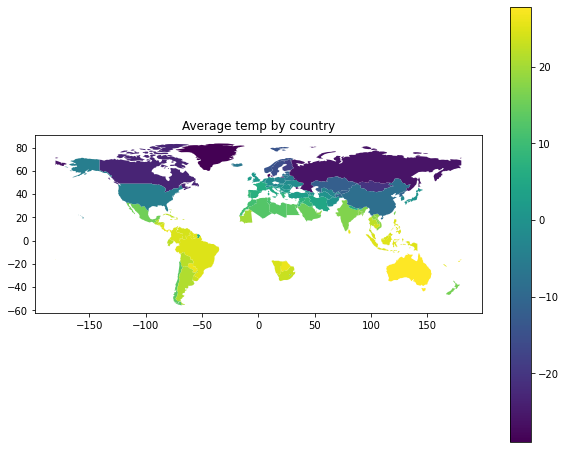

In [178]:
merged[merged.dt == pd.Timestamp(1867,1,1)].plot(column="AverageTemperature", figsize=(10,8), legend=True)
plt.title("Average temp by country")

In [175]:
import ipywidgets as widgets
from datetime import datetime

# go through each valid date and provide 
dates = merged.dt
options = [(date.strftime(' %d %b %Y '), date) for date in dates]

selection_range_slider = widgets.SelectionSlider(
    options=options,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)


In [177]:
def worldplot(date):
    dt = pd.to_datetime(date)
    merged[merged.dt==dt].plot(column='AverageTemperature',figsize=(20,9), legend = True)

widgets.interact(worldplot,date=selection_range_slider)


interactive(children=(SelectionSlider(description='Dates', index=327067, layout=Layout(width='500px'), options…

<function __main__.worldplot(date)>